#IoT Machine Learning

###Imports

In [214]:
import requests 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost import XGBRegressor    
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from array import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['array', 'datetime', 'typecodes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


###Funciones

In [0]:
def agregar_datos_fecha(df,col):
    df["Dia_semanal"] = df[col].dt.dayofweek  #Día de la semana Lunes = 0; Domingo = 6
    df["Semana_anual"] = df[col].dt.week      #Semanas del 1 al 52
    df["Mes"] = df[col].dt.month              #Mes del 1 al 12
    df["Hora"] = df[col].dt.hour              #Hora
    df["Año"] = df[col].dt.year               #Year
    df["Dia"] = df[col].dt.day                #Day
    df["dia_del_año"] = df[col].dt.dayofyear  #Day of year
    #df["Minuto"] = df[col].dt.minute  
    return df

###Get token


In [216]:
# api-endpoint 
URLToken = "https://industrial.api.ubidots.com/api/v1.6/auth/token/"
  
# APIKey given here 
ubidotsAPIKey = "BBFF-e9e7fa61f82ed6528bc5a5d6e95584b5e55"
  
# defining a params dict for the parameters to be sent to the API 
HEADERS = {'x-ubidots-apikey':ubidotsAPIKey} 
  
# sending get request and saving the response as response object 
r = requests.post(url = URLToken, headers = HEADERS) 
  
# extracting data in json format 
token = r.json() 
token = token['token']
print(token)

BBFF-SIH1ca6xQxAfUETYjqAaxtvlQzB7kjrewyL45MMtShZ0nUC4dKt8Ylp


##Get Data

###Get soil data

In [217]:
HEADERS = {'X-Auth-Token':token} 
URLSoil = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada9170ff4c3688aed9488/values/?page="
URLSoil1 = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada9170ff4c3688aed9488/values/"

dfSoilPart2 =[]

# sending get request and saving the response as response object 
reqSoil1 = requests.get(url = URLSoil1, headers = HEADERS) 

# extracting data in json format 
soilData1 = reqSoil1.json() 

#print(soilData['results'],['value'])
dfSoilPart  = pd.DataFrame.from_dict(soilData1['results'], orient='columns')

for i in range(2,22):
  x = URLSoil + str(i) 
  reqSoil = requests.get(url = x, headers = HEADERS) 
  soilData = reqSoil.json() 
  dfSoilPart2.append( pd.DataFrame.from_dict(soilData['results'], orient='columns') )

  print(i)



dfSoil = pd.concat( [dfSoilPart, dfSoilPart2[0], dfSoilPart2[1],dfSoilPart2[2],dfSoilPart2[3],
                     dfSoilPart2[4],dfSoilPart2[5],dfSoilPart2[6],dfSoilPart2[7],dfSoilPart2[8],
                     dfSoilPart2[9],dfSoilPart2[10],dfSoilPart2[11],dfSoilPart2[12],dfSoilPart2[13],
                     dfSoilPart2[14],dfSoilPart2[15],dfSoilPart2[16],dfSoilPart2[17],dfSoilPart2[18],
                      dfSoilPart2[19]])
print(dfSoil)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
        timestamp   value context     created_at
0   1589156257428   99.51      {}  1589156257543
1   1589156174178   99.51      {}  1589156174239
2   1589155965048   98.77      {}  1589155965098
3   1589155870471   98.77      {}  1589155870587
4   1589155777684   98.77      {}  1589155777848
5   1589154652829   68.40      {}  1589154652892
6   1589154561058   68.15      {}  1589154561105
7   1589154461141   68.40      {}  1589154461246
8   1589154357775   68.40      {}  1589154357824
9   1589154266048   67.90      {}  1589154266116
10  1589154174150   68.40      {}  1589154174201
11  1589154082212   68.40      {}  1589154082255
12  1589153990276   68.40      {}  1589153990346
13  1589153900826   68.40      {}  1589153900873
14  1589153804006   68.40      {}  1589153804065
15  1589153703957   68.40      {}  1589153704512
16  1589153612180   68.40      {}  1589153612232
17  1589153520376   68.40      {}  1589153520448
18  1589153428648

In [218]:
print(soilData1)

{'count': True, 'next': 'https://industrial.api.ubidots.com/api/v1.6/variables/5eada9170ff4c3688aed9488/values/?page=2', 'previous': None, 'results': [{'timestamp': 1589156257428, 'value': 99.51, 'context': {}, 'created_at': 1589156257543}, {'timestamp': 1589156174178, 'value': 99.51, 'context': {}, 'created_at': 1589156174239}, {'timestamp': 1589155965048, 'value': 98.77, 'context': {}, 'created_at': 1589155965098}, {'timestamp': 1589155870471, 'value': 98.77, 'context': {}, 'created_at': 1589155870587}, {'timestamp': 1589155777684, 'value': 98.77, 'context': {}, 'created_at': 1589155777848}, {'timestamp': 1589154652829, 'value': 68.4, 'context': {}, 'created_at': 1589154652892}, {'timestamp': 1589154561058, 'value': 68.15, 'context': {}, 'created_at': 1589154561105}, {'timestamp': 1589154461141, 'value': 68.4, 'context': {}, 'created_at': 1589154461246}, {'timestamp': 1589154357775, 'value': 68.4, 'context': {}, 'created_at': 1589154357824}, {'timestamp': 1589154266048, 'value': 67.9

###Get light data

In [219]:
HEADERS = {'X-Auth-Token':token} 
URLlight = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada8dc4763e77868862efa/values/?page="
URLlight1 = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada8dc4763e77868862efa/values/"
dfLightPart2 =[]

# sending get request and saving the response as response object 
reqLight1 = requests.get(url = URLlight1, headers = HEADERS) 

# extracting data in json format 
lightData1 = reqLight1.json() 

dfLightPart  = pd.DataFrame.from_dict(lightData1['results'], orient='columns')

for i in range(2,22):
  x = URLlight + str(i) 
  reqLight = requests.get(url = x, headers = HEADERS) 
  lightData = reqLight.json() 
  dfLightPart2.append( pd.DataFrame.from_dict(lightData['results'], orient='columns') )

  print(i)

dfLight = pd.concat( [dfLightPart, dfLightPart2[0], dfLightPart2[1],dfLightPart2[2],dfLightPart2[3],
                     dfLightPart2[4],dfLightPart2[5],dfLightPart2[6],dfLightPart2[7],dfLightPart2[8],
                     dfLightPart2[9],dfLightPart2[10],dfLightPart2[11],dfLightPart2[12],dfLightPart2[13],
                     dfLightPart2[14],dfLightPart2[15],dfLightPart2[16],dfLightPart2[17],dfLightPart2[18],
                      dfLightPart2[19]])
print(dfLight)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
        timestamp   value context     created_at
0   1589157402434   73.14      {}  1589157402508
1   1589157307847   73.54      {}  1589157307907
2   1589157207006   75.59      {}  1589157207062
3   1589157115203   71.19      {}  1589157115263
4   1589157023410   72.17      {}  1589157023467
5   1589156931433   77.44      {}  1589156931538
6   1589156839440   74.80      {}  1589156839499
7   1589156748089   78.52      {}  1589156748131
8   1589156655891   74.71      {}  1589156655986
9   1589156564140   75.98      {}  1589156564208
10  1589156472269   79.10      {}  1589156472347
11  1589156380475   78.71      {}  1589156380526
12  1589156223351   81.45      {}  1589156223424
13  1589156129032   81.45      {}  1589156129182
14  1589156026104   80.18      {}  1589156026240
15  1589155934261   81.45      {}  1589155934355
16  1589155839755   81.45      {}  1589155839797
17  1589155740984   81.64      {}  1589155741092
18  1589155632857

###Get temp data

In [220]:
HEADERS = {'X-Auth-Token':token} 
URLTemp1 =  "https://industrial.api.ubidots.com/api/v1.6/variables/5eb3075673efc3075d2c338d/values/"
URLTemp =  "https://industrial.api.ubidots.com/api/v1.6/variables/5eb3075673efc3075d2c338d/values/?page="

dfTempPart2 =[]

# sending get request and saving the response as response object 
reqTemp1 = requests.get(url = URLTemp1, headers = HEADERS) 

# extracting data in json format 
tempData1 = reqTemp1.json() 

dfTempPart  = pd.DataFrame.from_dict(tempData1['results'], orient='columns')

for i in range(2,22):
  x = URLTemp + str(i) 
  reqTemp = requests.get(url = x, headers = HEADERS) 
  tempData = reqTemp.json() 
  dfTempPart2.append( pd.DataFrame.from_dict(tempData['results'], orient='columns') )

  print(i)

dfTemp = pd.concat( [dfTempPart, dfTempPart2[0], dfTempPart2[1],dfTempPart2[2],dfTempPart2[3],
                     dfTempPart2[4],dfTempPart2[5],dfTempPart2[6],dfTempPart2[7],dfTempPart2[8],
                     dfTempPart2[9],dfTempPart2[10],dfTempPart2[11],dfTempPart2[12],dfTempPart2[13],
                     dfTempPart2[14],dfTempPart2[15],dfTempPart2[16],dfTempPart2[17],dfTempPart2[18],
                      dfTempPart2[19]])
print(dfTemp)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
        timestamp  value context     created_at
0   1589157498868  24.22      {}  1589157498934
1   1589157371662  24.67      {}  1589157371785
2   1589157268176  24.83      {}  1589157268227
3   1589157176253  25.19      {}  1589157176309
4   1589157084500  24.48      {}  1589157084563
5   1589156992675  23.48      {}  1589156992715
6   1589156900693  23.63      {}  1589156900755
7   1589156808686  25.36      {}  1589156808786
8   1589156716931  26.62      {}  1589156717011
9   1589156625132  27.21      {}  1589156625189
10  1589156533427  27.08      {}  1589156533500
11  1589156441469  27.45      {}  1589156441565
12  1589156351869  27.66      {}  1589156351919
13  1589156186971  27.26      {}  1589156187024
14  1589156087099  26.71      {}  1589156087153
15  1589155995278  26.07      {}  1589155995347
16  1589155903507  26.08      {}  1589155903631
17  1589155807966  26.20      {}  1589155808091
18  1589155693912  26.68      {}  15

###Get datetime

In [0]:
dfSoil['timestamp'] = dfSoil['timestamp'].astype(str).str[:-3].astype(np.int64)
dfTemp['timestamp'] = dfTemp['timestamp'].astype(str).str[:-3].astype(np.int64)
dfLight['timestamp'] = dfLight['timestamp'].astype(str).str[:-3].astype(np.int64)

dfSoil['timestamp'] = dfSoil['timestamp'] - 24*60*60 *2
dfTemp['timestamp'] = dfTemp['timestamp'] - 24*60*60 *2
dfLight['timestamp'] = dfLight['timestamp'] - 24*60*60 *2



In [0]:
dfSoil['date'] = pd.to_datetime(dfSoil['timestamp'], unit='s')
dfSoil = agregar_datos_fecha(dfSoil,'date')

dfTemp['date'] = pd.to_datetime(dfTemp['timestamp'], unit='s')
dfTemp = agregar_datos_fecha(dfTemp,'date')

dfLight['date'] = pd.to_datetime(dfLight['timestamp'], unit='s')
dfLight = agregar_datos_fecha(dfLight,'date')


In [223]:
tsS1 =  dfSoil['timestamp'].iloc[0]
tsT1 =  dfTemp['timestamp'].iloc[0]
tsL1 =  dfLight['timestamp'].iloc[0]

tsS2 = tsS1 + 3600
tsT2 = tsT1 + 3600
tsL2 = tsL1 + 3600

tsSoil = {'timestamp': [tsS2] }
tsTemp = {'timestamp': [tsT2] }
tsLight = {'timestamp': [tsL2] }

for i in range(2, 25):
  tsSoil['timestamp'].append( tsS1 + (3600 * i) ) 
  tsTemp['timestamp'].append( tsT2 + (3600 * i) ) 
  tsLight['timestamp'].append( tsL2 + (3600 * i) ) 

tsSoil = pd.DataFrame(tsSoil)
tsTemp = pd.DataFrame(tsTemp)
tsLight = pd.DataFrame(tsLight)

tsSoil['date'] = pd.to_datetime(tsSoil['timestamp'], unit='s')
tsTemp['date'] = pd.to_datetime(tsTemp['timestamp'], unit='s')
tsLight['date'] = pd.to_datetime(tsLight['timestamp'], unit='s')

tsSoil = agregar_datos_fecha(tsSoil,'date')
tsTemp = agregar_datos_fecha(tsTemp,'date')
tsLight = agregar_datos_fecha(tsLight,'date')

tsSoil

,timestamp,date,Dia_semanal,Semana_anual,Mes,Hora,Año,Dia,dia_del_año
0,1588987057,2020-05-09 01:17:37,5,19,5,1,2020,9,130
1,1588990657,2020-05-09 02:17:37,5,19,5,2,2020,9,130
2,1588994257,2020-05-09 03:17:37,5,19,5,3,2020,9,130
3,1588997857,2020-05-09 04:17:37,5,19,5,4,2020,9,130
4,1589001457,2020-05-09 05:17:37,5,19,5,5,2020,9,130
5,1589005057,2020-05-09 06:17:37,5,19,5,6,2020,9,130
6,1589008657,2020-05-09 07:17:37,5,19,5,7,2020,9,130
7,1589012257,2020-05-09 08:17:37,5,19,5,8,2020,9,130
8,1589015857,2020-05-09 09:17:37,5,19,5,9,2020,9,130
9,1589019457,2020-05-09 10:17:37,5,19,5,10,2020,9,130


##Clean Data

In [0]:
dfSoil = dfSoil.set_index('date')
dfTemp = dfTemp.set_index('date')
dfLight = dfLight.set_index('date')

###Delete unnecessary data

In [0]:
dfSoil = dfSoil.drop('context',axis=1)
dfSoil = dfSoil.drop('created_at',axis=1)
dfSoil = dfSoil.drop('timestamp',axis=1)

dfTemp = dfTemp.drop('context',axis=1)
dfTemp = dfTemp.drop('created_at',axis=1)
dfTemp = dfTemp.drop('timestamp',axis=1)

dfLight = dfLight.drop('context',axis=1)
dfLight = dfLight.drop('created_at',axis=1)
dfLight = dfLight.drop('timestamp',axis=1)

###Separate Data

In [226]:
xTrain, xTest,yTrain, yTest = train_test_split(dfSoil, dfSoil['value'],shuffle=False ,train_size = 0.8)
X_val, xTest, y_val, yTest = train_test_split(xTest, yTest, test_size =0.5, shuffle=False)
print ('Tamaño Original Training:',np.shape(dfSoil))
print ('Tamaño xTrain:',np.shape(xTrain))
print ('Tamaño yTrain:',np.shape(yTrain))
print ('Muestra xTest:',np.shape(xTest))
print ('Muestra yTest:',np.shape(yTest))

Tamaño Original Training: (2100, 8)
Tamaño xTrain: (1680, 8)
Tamaño yTrain: (1680,)
Muestra xTest: (210, 8)
Muestra yTest: (210,)


##Linear Regression

###Graphs

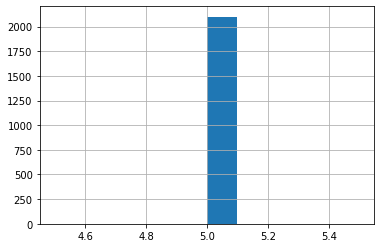

In [227]:
dfSoil['Mes'].hist()

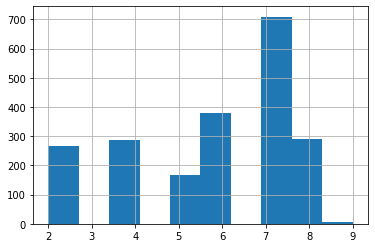

In [228]:
dfSoil['Dia'].hist()


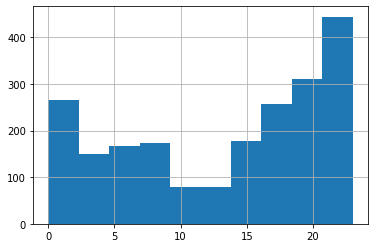

In [229]:
dfSoil['Hora'].hist()

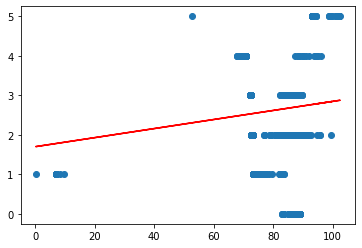

In [230]:
data = dfSoil
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

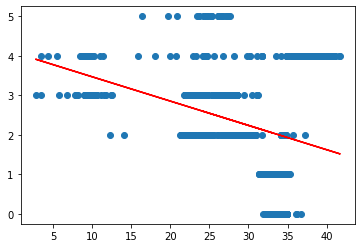

In [231]:
data = dfTemp
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

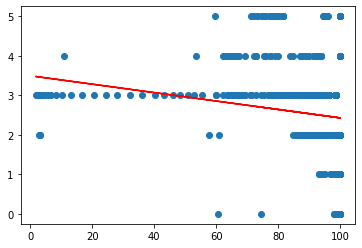

In [232]:
data = dfLight
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

##Linear Model

In [233]:
from sklearn import linear_model
regSoil = linear_model.LinearRegression()
regTemp = linear_model.LinearRegression()
regLight = linear_model.LinearRegression()

regSoil.fit(dfSoil[['Dia_semanal','Semana_anual','Mes','Hora','Año','Dia','dia_del_año']],dfSoil.value)
regTemp.fit(dfTemp[['Dia_semanal','Semana_anual','Mes','Hora','Año','Dia','dia_del_año']],dfTemp.value)
regLight.fit(dfLight[['Dia_semanal','Semana_anual','Mes','Hora','Año','Dia','dia_del_año']],dfLight.value)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
print(regSoil.coef_)
print(regTemp.coef_)
print(regLight.coef_)

[ 4.68253163e+11  3.27777214e+12 -7.81250000e-03 -1.80175781e-01
  0.00000000e+00  7.26455447e+12 -7.73280763e+12]
[ 1.51038222e+12  5.94727225e+10 -8.54492188e-04  1.51855469e-01
  0.00000000e+00  1.81998978e+12 -3.33037200e+12]
[-1.33194948e+00 -3.40094206e-02  2.22044605e-16  1.87839384e-01
  0.00000000e+00 -1.57001542e+00 -1.57001542e+00]


In [235]:
print(regSoil.intercept_)
print(regTemp.intercept_)
print(regLight.intercept_)

875265065724647.5
407886558713968.56
298.60558452870754


In [236]:
#Agregar Valores
predictSoil = []
predictTemp = []
predictLight = []

for i in range(0,23):
  predictSoil.append(regSoil.predict([[tsSoil['Dia_semanal'].iloc[i] , tsSoil['Semana_anual'].iloc[i] , tsSoil['Mes'].iloc[i] , tsSoil['Hora'].iloc[i], tsSoil['Año'].iloc[i], tsSoil['Dia'].iloc[i], tsSoil['dia_del_año'].iloc[i]]]) )
  predictTemp.append(regTemp.predict([[tsTemp['Dia_semanal'].iloc[i] , tsTemp['Semana_anual'].iloc[i] , tsTemp['Mes'].iloc[i] , tsTemp['Hora'].iloc[i], tsTemp['Año'].iloc[i], tsTemp['Dia'].iloc[i], tsTemp['dia_del_año'].iloc[i]]]) )
  predictLight.append(regLight.predict([[tsLight['Dia_semanal'].iloc[i] , tsLight['Semana_anual'].iloc[i] , tsLight['Mes'].iloc[i] , tsLight['Hora'].iloc[i], tsLight['Año'].iloc[i], tsLight['Dia'].iloc[i], tsLight['dia_del_año'].iloc[i]]]) )

  print([tsSoil['Dia_semanal'].iloc[i] , tsSoil['Semana_anual'].iloc[i] , tsSoil['Mes'].iloc[i] , tsSoil['Hora'].iloc[i], tsSoil['Año'].iloc[i], tsSoil['Dia'].iloc[i], tsSoil['dia_del_año'].iloc[i]])
print(dfSoil.value)

[5, 19, 5, 1, 2020, 9, 130]
[5, 19, 5, 2, 2020, 9, 130]
[5, 19, 5, 3, 2020, 9, 130]
[5, 19, 5, 4, 2020, 9, 130]
[5, 19, 5, 5, 2020, 9, 130]
[5, 19, 5, 6, 2020, 9, 130]
[5, 19, 5, 7, 2020, 9, 130]
[5, 19, 5, 8, 2020, 9, 130]
[5, 19, 5, 9, 2020, 9, 130]
[5, 19, 5, 10, 2020, 9, 130]
[5, 19, 5, 11, 2020, 9, 130]
[5, 19, 5, 12, 2020, 9, 130]
[5, 19, 5, 13, 2020, 9, 130]
[5, 19, 5, 14, 2020, 9, 130]
[5, 19, 5, 15, 2020, 9, 130]
[5, 19, 5, 16, 2020, 9, 130]
[5, 19, 5, 17, 2020, 9, 130]
[5, 19, 5, 18, 2020, 9, 130]
[5, 19, 5, 19, 2020, 9, 130]
[5, 19, 5, 20, 2020, 9, 130]
[5, 19, 5, 21, 2020, 9, 130]
[5, 19, 5, 22, 2020, 9, 130]
[5, 19, 5, 23, 2020, 9, 130]
date
2020-05-09 00:17:37     99.51
2020-05-09 00:16:14     99.51
2020-05-09 00:12:45     98.77
2020-05-09 00:11:10     98.77
2020-05-09 00:09:37     98.77
2020-05-08 23:50:52     68.40
2020-05-08 23:49:21     68.15
2020-05-08 23:47:41     68.40
2020-05-08 23:45:57     68.40
2020-05-08 23:44:26     67.90
2020-05-08 23:42:54     68.40
2020-05

In [237]:
predictSoil

[array([76.875]),
 array([76.75]),
 array([76.5]),
 array([76.25]),
 array([76.125]),
 array([76.]),
 array([75.75]),
 array([75.625]),
 array([75.375]),
 array([75.25]),
 array([75.]),
 array([74.875]),
 array([74.75]),
 array([74.5]),
 array([74.375]),
 array([74.125]),
 array([74.]),
 array([73.75]),
 array([73.625]),
 array([73.5]),
 array([73.25]),
 array([73.125]),
 array([72.875])]

In [238]:
predictTemp

[array([21.]),
 array([21.3125]),
 array([21.4375]),
 array([21.625]),
 array([21.75]),
 array([21.9375]),
 array([22.0625]),
 array([22.1875]),
 array([22.375]),
 array([22.5]),
 array([22.6875]),
 array([22.8125]),
 array([22.9375]),
 array([23.125]),
 array([23.25]),
 array([23.4375]),
 array([23.5625]),
 array([23.75]),
 array([23.875]),
 array([24.0625]),
 array([24.1875]),
 array([24.3125]),
 array([19.0625])]

In [239]:
predictLight

[array([73.25535365]),
 array([73.63103241]),
 array([73.8188718]),
 array([74.00671118]),
 array([74.19455057]),
 array([74.38238995]),
 array([74.57022933]),
 array([74.75806872]),
 array([74.9459081]),
 array([75.13374749]),
 array([75.32158687]),
 array([75.50942625]),
 array([75.69726564]),
 array([75.88510502]),
 array([76.07294441]),
 array([76.26078379]),
 array([76.44862317]),
 array([76.63646256]),
 array([76.82430194]),
 array([77.01214133]),
 array([77.19998071]),
 array([77.38782009]),
 array([68.59553394])]

In [240]:
print(regSoil.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


##Send a Ubidots endpoint


In [241]:
breakPoint #Esto es para evitar subir los datos a ubidots 

NameError: ignored

In [0]:
import requests
import time
BASE_URL = "https://industrial.api.ubidots.com"
REQUESTS_FUNCTIONS = {"get": requests.get, "post": requests.post}

def main(args):
    '''
    Main function - runs every time the function is executed.
    "args" is a dictionary containing both the URL params and the HTTP body (for POST requests).
    '''
    token = args.get('token', None)
    device = args.get('device', None)

    if token is None or device is None:
        print("[ERROR] Please send your Ubidots Token and device label to update in your args")
        return {"status": "error"}
    
    del args['token']
    del args['device']

    # Log the payload to the console, for debugging purposes. You may access the function's logs using
    # the option in the above header.

    print("[INFO] Payload to send: {}".format(args))

    # Use the remaining parameters as payload
    req = update_device(device, args, token)

    # Prints the request result

    print("[INFO] Request result:")
    print(req.text)

    return {"status": "Ok", "result": req.json()}

def update_device(device, payload, token):
    """
    updates a variable with a single dot
    """

    url = "{}/api/v1.6/devices/{}".format(BASE_URL, device)
    headers = {"X-Auth-Token": token, "Content-Type": "application/json"}

    req = create_request(url, headers, payload, attempts=5, request_type="post")
    
    return req

def create_request(url, headers, data, attempts, request_type):
    """
    Function to create a request to the server
    """

    request_func = REQUESTS_FUNCTIONS.get(request_type)

    kwargs = {"url": url, "headers": headers}

    if request_type == "post":
        kwargs["json"] = data

    try:
        req = request_func(**kwargs)
        print("[INFO] Request result: {}".format(req.text))
        status_code = req.status_code
        time.sleep(1)

        while status_code >= 400 and attempts < 5:
            req = request_func(**kwargs)
            print("[INFO] Request result: {}".format(req.text))
            status_code = req.status_code
            attempts += 1
            time.sleep(1)

        return req
    except Exception as e:
        print("[ERROR] There was an error with the request, details:")
        print(e)
        return None


In [243]:
#SOIL
device = "node-mcu"
token = "BBFF-sCI4BMLnYxSCDgJwsR5AwQlwIqYsl6"

for i in range(0,23):
  payload = { "soil-humidity-prediction":predictSoil[i][0]}
  update_device( device , payload , token )


[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Reque

In [244]:
for i in range(0,23):
  payload = { "Air Temperature-prediction":predictTemp[i][0]}
  update_device( device , payload , token )


[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_

In [245]:
for i in range(0,23):
  payload = { "luminosity-prediction":predictLight[i][0]}
  update_device( device , payload , token )


[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{

##XGboost

###xgboost implementation

In [0]:

maxDepth = [5]
learningRate = [0.1] 
subSample = [1] 

model = XGBRegressor(max_depth = 5, learning_rate = 0.1, subsample =1, n_jobs = -1)
#eval_set = [(xTrain, yTrain), (xTest, yTest)]
model.fit(xTrain, yTrain, eval_set=[(X_val, y_val)],  verbose = True)

#MAPE
y_pred_proba = model.predict(xTest)
y_true = yTest
#r = mean_absolute_percentage_error(y_true,y_pred_proba)
meanSquare = mean_squared_error(y_val, model.predict(X_val))
#estimators1.append(x)


In [0]:
print ((xTrain))
print ((yTrain))
print ((xTest))
print ((yTest))

#Testing

In [0]:

timestamp = 1588889538
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

In [0]:
dt_object = datetime.fromtimestamp(dfSoil['timestamp'])

In [0]:
hello = pd.to_datetime(dfSoil['timestamp']).apply(lambda x: x.date())
dfSoil['date'] = pd.to_datetime(dfSoil['timestamp'], unit='s')


In [0]:
dfTemp.hist()

In [0]:
dfSoil['Dia'].hist()

In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 2000)
dfSoil

In [0]:
dfLight 

In [0]:
dfTemp

In [0]:
dfLight

In [247]:
dfSoil


,value,Dia_semanal,Semana_anual,Mes,Hora,Año,Dia,dia_del_año
date,,,,,,,,
2020-05-09 00:17:37,99.51,5,19,5,0,2020,9,130
2020-05-09 00:16:14,99.51,5,19,5,0,2020,9,130
2020-05-09 00:12:45,98.77,5,19,5,0,2020,9,130
2020-05-09 00:11:10,98.77,5,19,5,0,2020,9,130
2020-05-09 00:09:37,98.77,5,19,5,0,2020,9,130
2020-05-08 23:50:52,68.40,4,19,5,23,2020,8,129
2020-05-08 23:49:21,68.15,4,19,5,23,2020,8,129
2020-05-08 23:47:41,68.40,4,19,5,23,2020,8,129
2020-05-08 23:45:57,68.40,4,19,5,23,2020,8,129


In [246]:
tsSoil

,timestamp,date,Dia_semanal,Semana_anual,Mes,Hora,Año,Dia,dia_del_año
0,1588987057,2020-05-09 01:17:37,5,19,5,1,2020,9,130
1,1588990657,2020-05-09 02:17:37,5,19,5,2,2020,9,130
2,1588994257,2020-05-09 03:17:37,5,19,5,3,2020,9,130
3,1588997857,2020-05-09 04:17:37,5,19,5,4,2020,9,130
4,1589001457,2020-05-09 05:17:37,5,19,5,5,2020,9,130
5,1589005057,2020-05-09 06:17:37,5,19,5,6,2020,9,130
6,1589008657,2020-05-09 07:17:37,5,19,5,7,2020,9,130
7,1589012257,2020-05-09 08:17:37,5,19,5,8,2020,9,130
8,1589015857,2020-05-09 09:17:37,5,19,5,9,2020,9,130
9,1589019457,2020-05-09 10:17:37,5,19,5,10,2020,9,130


In [0]:
tsSoil

In [0]:
tsTemp

In [0]:
tsLight